In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mobile_train_data = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
mobile_test_data = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [4]:
mobile_test_data.shape

(1000, 21)

In [5]:
mobile_test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
mobile_test_data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [7]:
mobile_train_data.shape

(2000, 21)

In [8]:
mobile_train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
mobile_train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
mobile_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
mobile_train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
mobile_train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
mobile_train_data = mobile_train_data.astype(float)

In [14]:
mobile_train_data.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
price_range      float64
dtype: object

<AxesSubplot:xlabel='price_range', ylabel='count'>

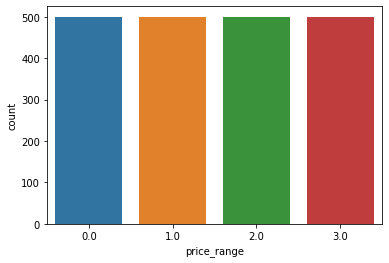

In [15]:
sns.countplot(x = "price_range",data = mobile_train_data)

In [16]:
 mobile_train_data.price_range.value_counts()

1.0    500
2.0    500
3.0    500
0.0    500
Name: price_range, dtype: int64

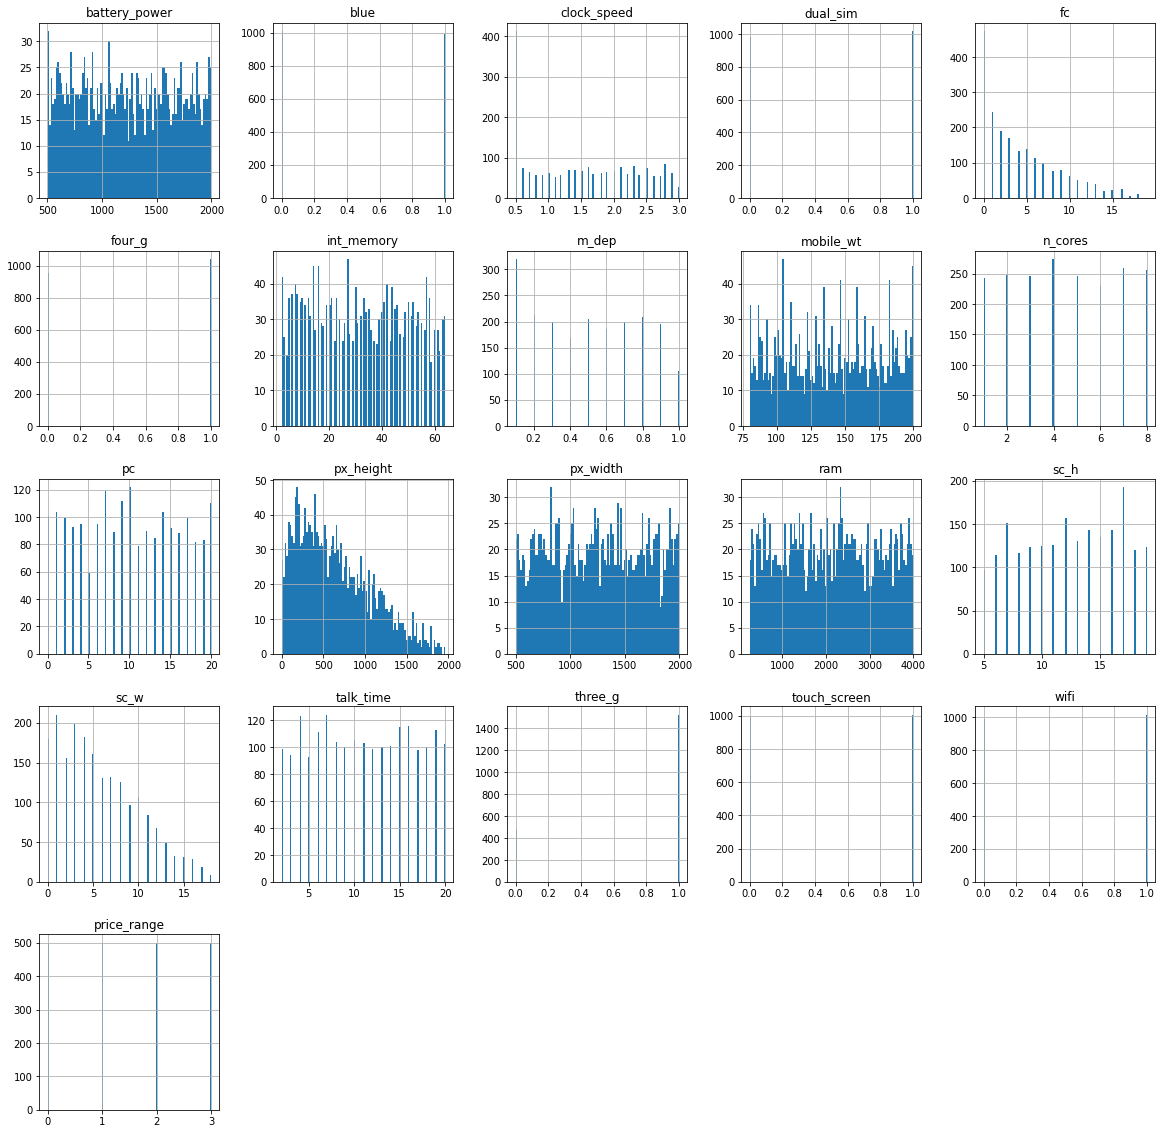

In [17]:
mobile_train_data.hist(bins = 100,figsize = (20,20))
plt.show()

In [18]:
corr_matrix = mobile_train_data.corr()

<AxesSubplot:>

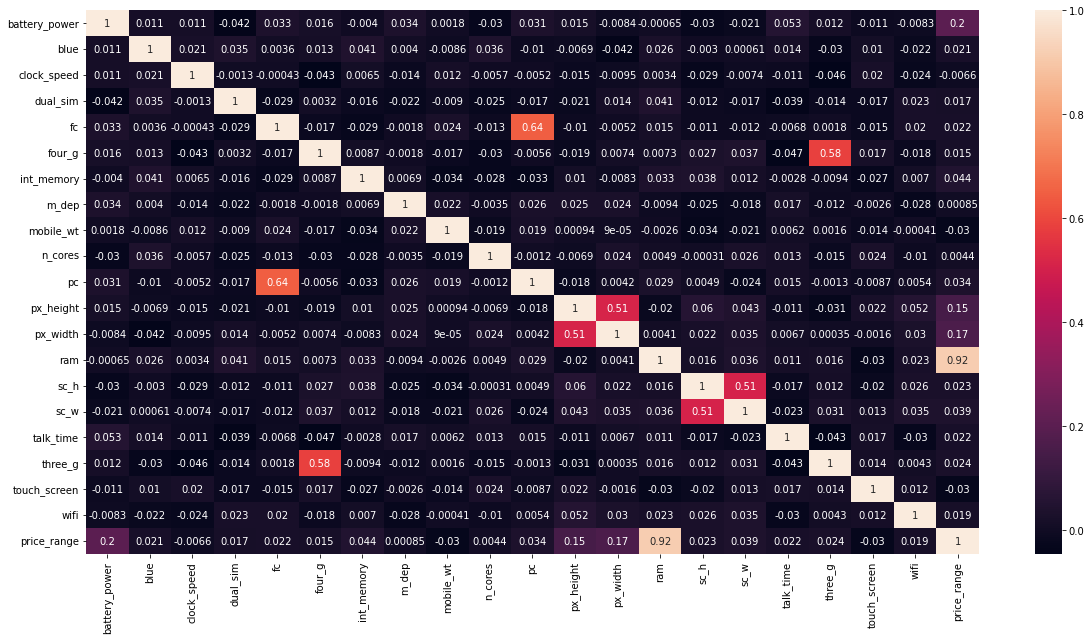

In [19]:
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(corr_matrix,annot = True)

In [20]:
corr_matrix['price_range'].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [21]:
attributes = ['price_range','ram','battery_power','px_width','px_height']

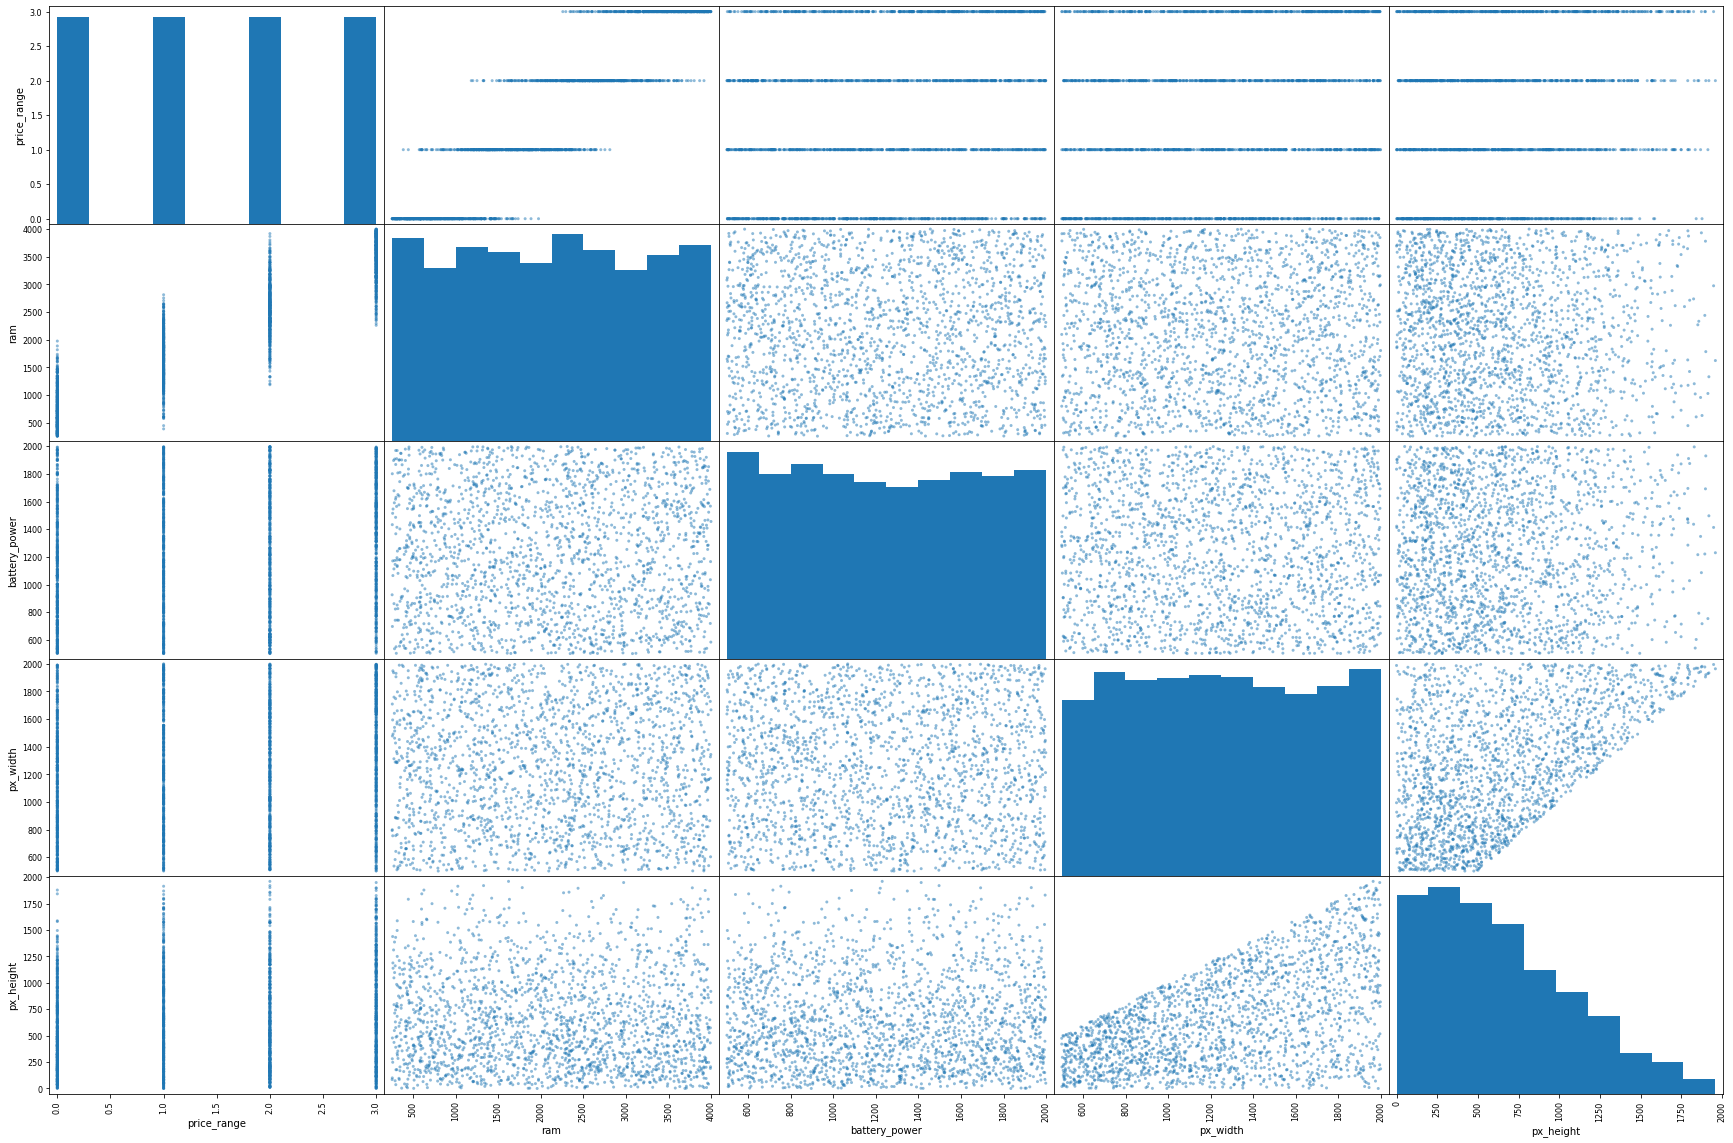

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(mobile_train_data[attributes],figsize = (30,20))
plt.show()

<AxesSubplot:>

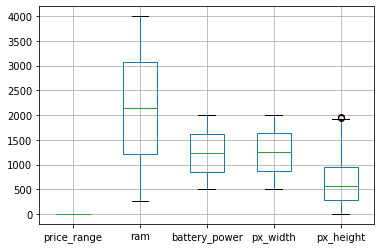

In [23]:
mobile_train_data[attributes].boxplot()

<AxesSubplot:xlabel='px_height'>

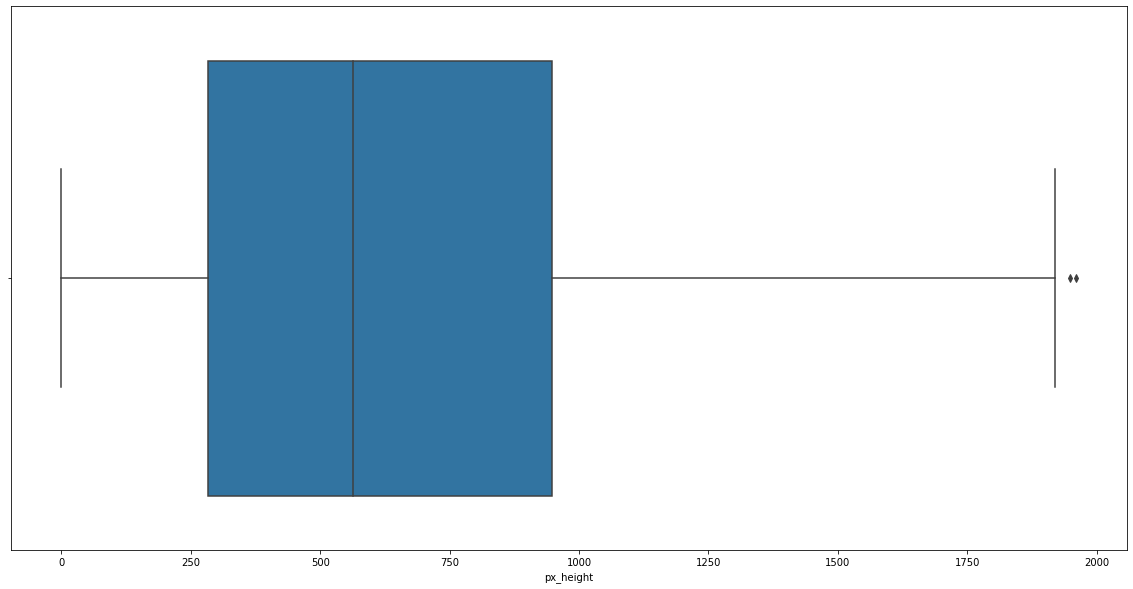

In [24]:
ax,fig = plt.subplots(figsize = (20,10))
sns.boxplot(x = 'px_height',data = mobile_train_data)

In [25]:
filter1 = mobile_train_data[(mobile_train_data['px_height']>1900)]
filter1.shape

(5, 21)

In [26]:

mobile_train_data = mobile_train_data.drop(index = mobile_train_data[(mobile_train_data['px_height']>1940)].index)

<AxesSubplot:xlabel='px_height'>

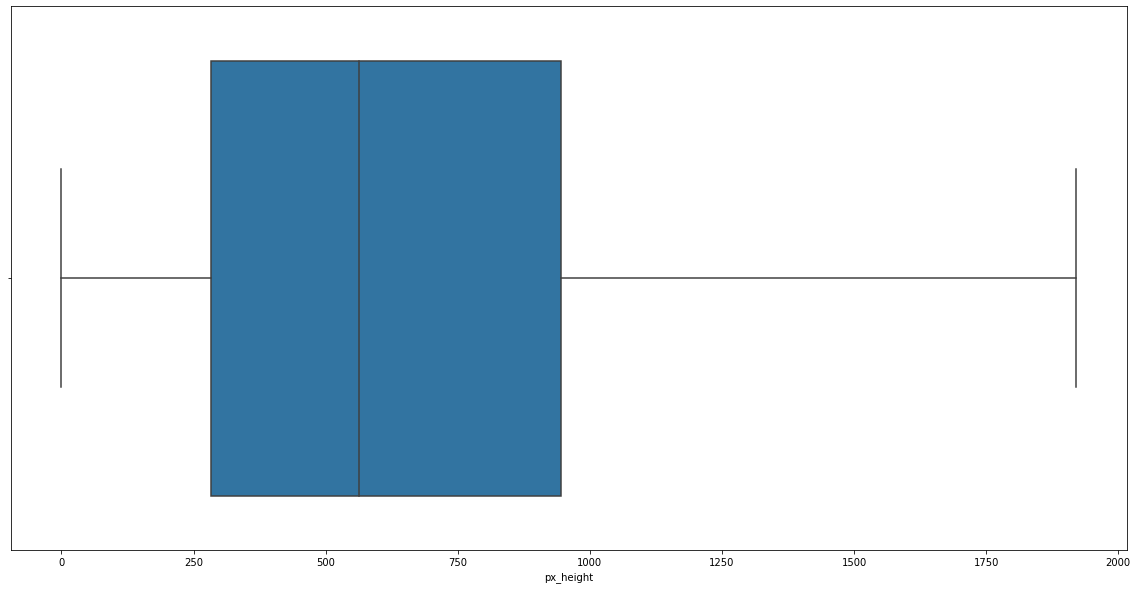

In [27]:
ax,fig = plt.subplots(figsize = (20,10))
sns.boxplot(x = 'px_height',data = mobile_train_data)

<AxesSubplot:>

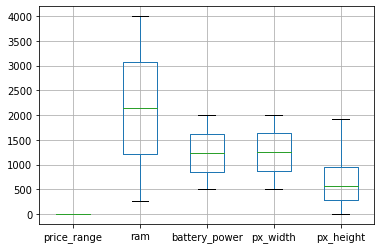

In [28]:
mobile_train_data[attributes].boxplot()

In [29]:
x = mobile_train_data[['ram','battery_power','px_width','px_height']]
y = mobile_train_data[['price_range']]
x.shape,y.shape

((1998, 4), (1998, 1))

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[ 0.39174839, -0.90199253, -1.14615292, -1.41145781],
       [ 0.46733982, -0.49472151,  1.70771783,  0.59101987],
       [ 0.44152811, -1.53678926,  1.07764247,  1.40106168],
       ...,
       [ 0.8600465 ,  1.53025729,  0.88306038,  0.50730046],
       [-1.15695403,  0.62242971, -1.34536792, -0.69644883],
       [ 1.65467834, -1.65737788, -1.15078583, -0.3638339 ]])

In [32]:
x.shape

(1998, 4)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [35]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1598, 4), (1598, 1), (400, 4), (400, 1))

In [36]:
from sklearn.svm import LinearSVC

In [37]:
model = LinearSVC(C = 1.0,max_iter = 100000,tol = 1e-3,dual = False)
model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(dual=False, max_iter=100000, tol=0.001)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [39]:
y_pred = model.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.84      0.70        93
         1.0       0.44      0.18      0.26       110
         2.0       0.40      0.04      0.07       104
         3.0       0.41      0.96      0.58        93

    accuracy                           0.48       400
   macro avg       0.46      0.50      0.40       400
weighted avg       0.46      0.48      0.39       400



In [41]:
accuracy_score(y_test,y_pred)

0.4775

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
accuracy_score(y_test,y_pred)

0.7225

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88        93
         1.0       0.75      0.48      0.59       110
         2.0       0.59      0.49      0.54       104
         3.0       0.73      1.00      0.84        93

    accuracy                           0.72       400
   macro avg       0.72      0.74      0.71       400
weighted avg       0.71      0.72      0.70       400



In [46]:
mobile_test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [47]:
x_mobile_test = mobile_test_data[['ram','battery_power','px_width','px_height']]
y_test_pred = pd.DataFrame(model.predict(x_mobile_test),columns = ['price_range'],dtype = np.float64)
y_test_pred.head()

,price_range
0,3.0
1,3.0
2,3.0
3,3.0
4,1.0


In [48]:
y_test_pred.shape

(1000, 1)

In [49]:
y_test_pred.dtypes

price_range    float64
dtype: object

In [50]:
final_test_data = pd.concat([mobile_test_data,y_test_pred],axis = 1)


In [51]:
final_test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3.0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3.0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3.0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3.0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0


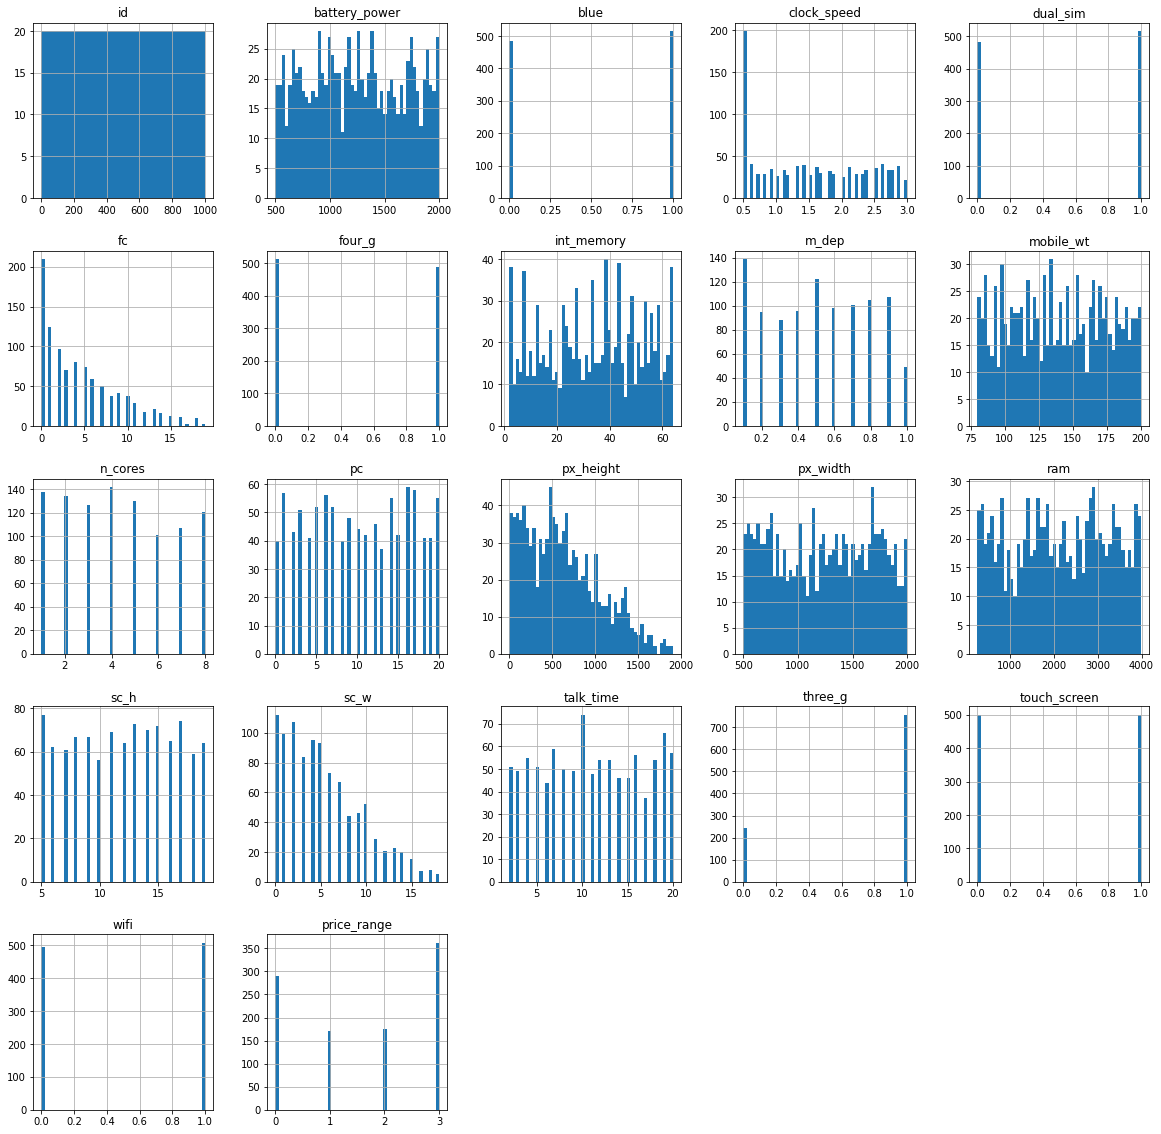

In [52]:
final_test_data.hist(bins = 50,figsize = (20,20))
plt.show()

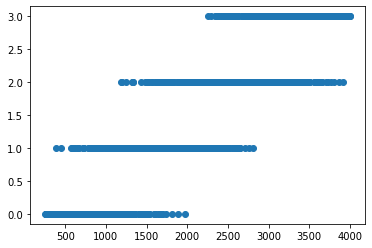

In [53]:
plt.scatter(x = mobile_train_data['ram'],y = mobile_train_data['price_range'])

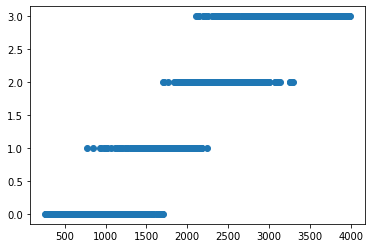

In [54]:
plt.scatter(x = final_test_data['ram'],y = final_test_data['price_range'])